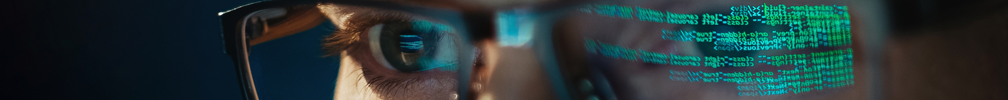

# Week 4 Overview

How can we ensure that a machine learning model trained on past data performs well on new, unseen examples? Imagine a model trained to predict housing prices: if it’s too simple, it might miss important details, while an overly complex model might fit the noise in the data and fail to generalize to new examples. In either case, it would be useless to provide insights to a developer planning to build new units. This tradeoff is fundamental in machine learning, and understanding it is key to building useful models.

Last week, we explored how to evaluate machine learning models and how to balance **underfitting** and **overfitting**. A useful statistical approach to quantifying this problem is the **bias-variance tradeoff—**the balance between overly simplistic models (high bias = underfitting) and overly flexible models (high variance = overfitting).

This week, we discuss the holy grail of ML model development: **generalization**, the ability of a model to perform well on new data. The key to achieving generalization lies in splitting a dataset into **training**, **validation**, and **test sets** and implementing techniques like **cross-validation** to ensure robust evaluation. 

By the end of the week, you’ll understand how to use these methods to assess a model’s generalization capabilities and avoid common pitfalls like overfitting. These skills will help you build stronger, more reliable models as we move forward into more advanced topics.

## Key Terms
- **Training Set:** A subset of the dataset used to train the machine learning model by fitting the model's parameters to the data
- **Test Set:** A separate subset of the data, not used during training, reserved for evaluating the final performance of the trained model on unseen data
- **Validation Set:** A subset of the data used to fine-tune model parameters (such as hyperparameters) and evaluate different models during the training process without touching the test set
- **Train-Validation-Test Split:** The process of dividing the data into three parts: a **training set** to train the model, a **validation set** to tune the model, and a test set to evaluate the model’s generalization to new, unseen data
- **Cross-Validation:** A technique that divides the data into multiple folds, where each fold takes turns being the validation set while the remaining folds are used for training. The results are averaged to provide a more reliable estimate of model performance.
- **Leave-One-Out Cross Validation:** A version of cross-validation where validation sets consist of a single datapoint

### Learning Objectives:
By the end of the week, you will be able to:
- Explain the concept of generalization and its importance in building machine learning models that perform well on unseen data
- Describe the role of the train-test-validation split and how each subset contributes to evaluating model performance
- Examine overfitting and underfitting by tuning models based on training and validation performance and assess final performance using the test set
- Apply cross-validation techniques to estimate how well a model generalizes and to avoid overfitting


## 4.1 Lesson: Sampling Theory and The Test-Train Split

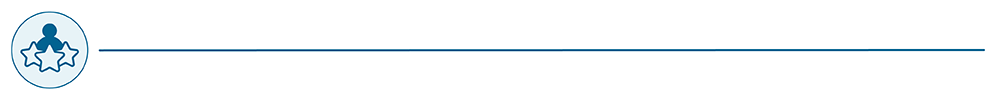

**Note:** Now would be a good time to review basic statistics and the Central Limit Theorem (CLT) from Module 1!

In statistics, sampling refers to the process of randomly choosing a subset of a larger population:

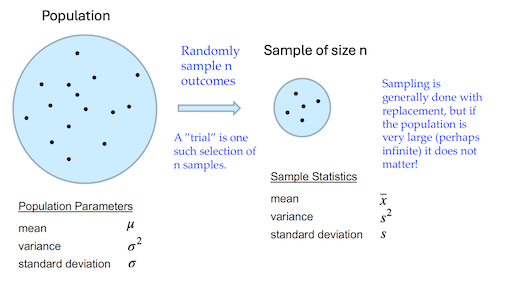

Example: 
Suppose you are the data scientist on a medical research project on the effect of the weight-loss drug Ozempic; the population is all 8 billion people on Earth, and the dataset might be 25,000 **(height, weight)** tuples obtained from the World Health Organization’s Health Observatory.

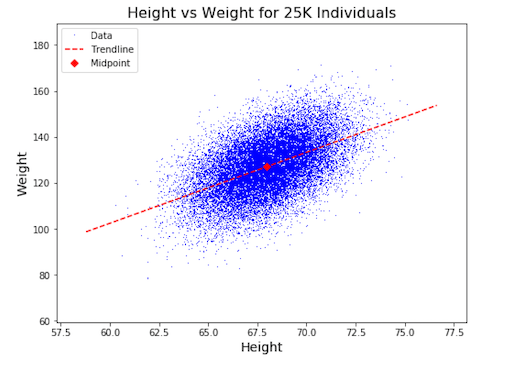

The fundamental idea of sampling is to take a random subset of the population and use the characteristics of the sample to estimate the population characteristics of interest. For example, if you are interested in the average income $\mu$ of data scientists, then the average income $s$ of a sample will be an unbiased approximation of this number. As you learned in Module 1, the CLT can precisely quantify the accuracy of the sample estimates using the sample size $n$.  

### Key Insights on Viewing a Dataset as a Population Sample:
1. **Irreducible Errors:** The population is assumed to have irreducible errors due to factors beyond your control, such as measurement errors or inherent variability.
2. **Ideal Model with Full Population:** If the entire population $P$ were available (which is typically impossible), it could be used to determine the ideal model $F$ that captures all the patterns in the data: $Y = f(P) + e_{irred}$, where $e_{irred}$ represents only the irreducible errors.
3. **Model Trained on a Sample:** In practice, a model trained on a sample $X_{train}$ is only an estimate of the true model and thus will incure additional reduible errors: $Y = \hat{f} ((X_{train}) + e_{irred} + e_{red})$.
4. **Effect of Sample Size:** According to the CLT, the larger the dataset, the better the model's approximation of the true function $f$, and the smaller the component of reducible errors. Therefore **train your models on as much data as possible**. 
5. **Test Set and Generalization:** Any "new" or "unseen" data is effectively drawn from the same underlying population as your training data. By sampling a test set $X_{test}$ from this population, you can estimate how well your model generalizes to the entire population. A larger, more representative test set yields more reliable and accurate metrics for assessing your model’s performance on unseen data, and hence on how well your model will generalize.
6. **Random Sampling:** Ideally, both the training and test sets should be selected *uniformly at random* from the population. This ensures that they are drawn from the same distribution and that the two sets do not overlap:$ X_{train} \cap X_{test} \quad = \quad \phi$. In cases where the population is small or obtaining more data is difficult, this ideal scenario may not be possible.
7. **Bootstrap Sampling:** When the dataset is small, or the population distribution is unknown, data is repeatedly resampled with replacement to create multiple datasets, called bootstrap samples. By calculating a statistic (like the mean) on each sample, we can estimate the variability or distribution of that statistic.

A straightforward conclusion from these considerations is a series of protocols for using your dataset to simulate the sampling of training and testing sets from the ideal population.

### The Test-Train Split
The **train-test split** is a common method in machine learning used to evaluate a model's ability to generalize. In this approach, the dataset is first randomly shuffled and then divided into two parts: a **training set** and a **test set**. A parameter $p$ determines the percentage devoted to the training set. Clearly, both sets are identically sampled, and presumably disjoint.

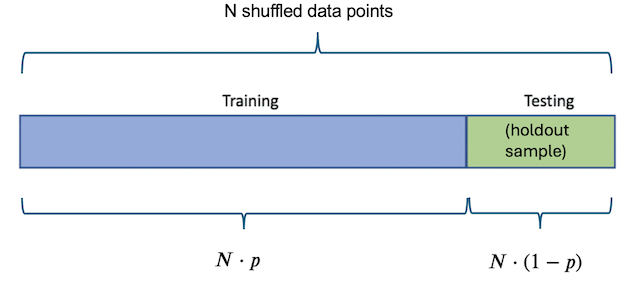

The model is trained on the **training set**, where it learns the relationships between the input features and the target variable. Once trained, the model is evaluated on the **test set**, which contains data it has never seen before. This allows you to measure how well the model generalizes to new, unseen data, helping to identify issues like overfitting or underfitting. Typically, a common split is 80% of the data for training and 20% for testing, though this can vary depending on the dataset size and the problem at hand. 

In native Python code, we could write this as:

In [16]:
import numpy as np
 
def test_train_split(D, p=0.8): # typical value is 80% training
  N= len(D)
  np.random.shuffle(D)
  split_index = int (p * N)
  return (D[:split_index],D[split_index:])
 
# test
data = list(range(20))
data_train, data_test = test_train_split(data)
 
print(f'Training set: {data_train}')
print(f'Test set: {data_test}')

Training set: [18, 2, 11, 5, 0, 12, 10, 4, 6, 3, 9, 17, 16, 15, 19, 1]
Test set: [14, 8, 13, 7]


Alternatively, this can be done in `sklearn` as

In [17]:
from sklearn.model_selection import train_test_split

p = 0.8
data = list(range(20))
data_train, data_test = train_test_split(data)
print(f'Training set: {data_train}')
print(f'Test set: {data_test}')

Training set: [6, 3, 5, 8, 16, 18, 11, 17, 19, 10, 7, 9, 14, 4, 12]
Test set: [1, 13, 0, 15, 2]


The most important thing to remember when developing your model is: **do not train on the test set!** The goal is to develop a model that performs well on completely unseen data. If you use the test set during training, then the test data is no longer "unseen." It’s like preparing for a final exam in a difficult ML class: if you only study the questions on last year’s exam, you’ll be in trouble if this year’s questions are different! Similarly, training with the test set means the model is overfitted to that specific data, and it will likely perform poorly on new, unseen examples. 

**You need to keep the test set completely isolated when developing your model,** just like your professor is not likely to let you see the final exam in advance!

We may now view the machine learning workflow as follows:

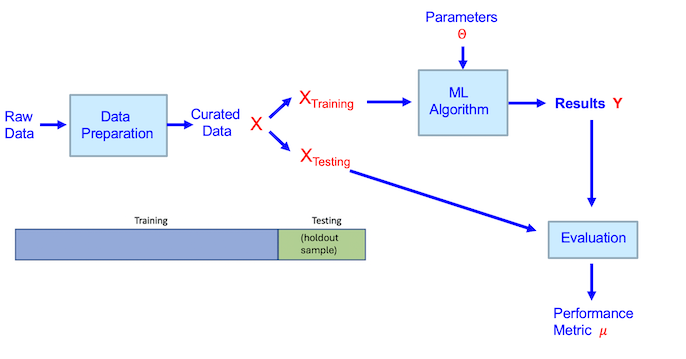

But if we can’t evaluate our models during training, how do we tune our model for the best generalization?

The answer to this question is to use a second test set, called a **validation set**, which is used to evaluate the model during training.

## 4.2 Lesson: Validation Sets
While splitting your data into a training set and a held-out testing set is a good first step, it’s often not enough to ensure a model will generalize well. How do you decide which model is best while avoiding overfitting during training? This is where a **validation set** comes in—a subset of the data used to fine-tune the model’s parameters before evaluating it on the test set. Essentially, this creates a **two-level hierarchy of tests:** the validation set is used for model evaluation during training, and the test set is reserved for final evaluation. 

Imagine you're building a model to predict house prices, and you've tried several different models with various levels of complexity. If you evaluate each model directly on the test set, you risk overfitting to that specific test data. Instead, you can use a validation set to choose the best-performing model and reserve the test set for the final evaluation, ensuring an unbiased estimate of how well the model will perform on truly unseen data.

A parameter $p$ specifies the percentage of the dataset used for training and $q$ the percentage used for validation.

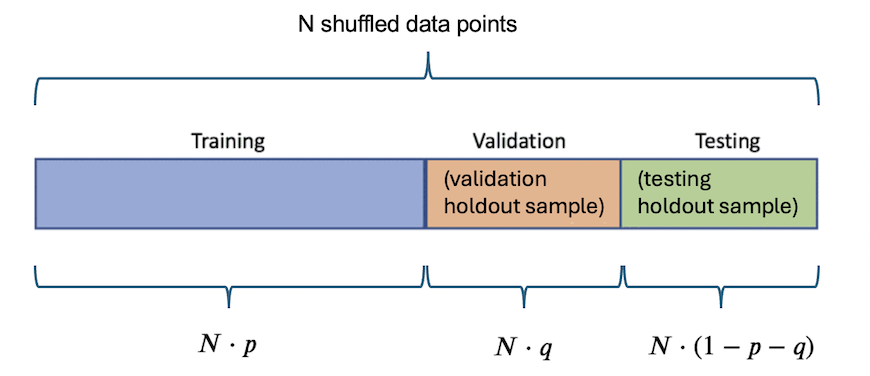

In native python, we could write this split as follows:

In [25]:
import numpy as np
 
def train_val_test_split(D, p, q):
 
  N = len(D)
 
  np.random.shuffle(D)
 
  train_split = int(N * p)                           # Calculate split indices
 
  val_split = int(N * (p + q))
 
  D_train = D [:train_split]                         # First p % for training
 
  D_val = D [:train_split:val_split]                 # Next q % for validation
 
  D_test = D [val_split]                             # Remaining for testing
 
  return (D_train, D_val, D_test)
 
p = 0.6
 
q = 0.2
 
data = list (range (20))
 
data_train, data_val, data_test = train_val_test_split (data, p, q)
 
print(f'Training set: {data_train}')
print(f'Validation set: {data_val}')
print(f'Test set: {data_test}')

Training set: [1, 0, 19, 8, 11, 4, 17, 6, 15, 18, 3, 2]
Validation set: [1]
Test set: 5


In `sklearn` we would have to split twice, as follows:

In [22]:
from sklearn.model_selection import train_test_split
 
p = 0.6             # train size
 
q = 0.2             # validation size
 
data = list(range(20))
 
# First, split into train and test+validation sets
 
data_train, data_temp = train_test_split(data, train_size=p)
 
# Then split the remaining into validation and test sets
 
test_size = (1 - p - q)/(1-p)
 
data_val, data_test = train_test_split(data_temp, test_size = test_size)

print(f'Training set: {data_train}')
print(f'Validation set: {data_val}')
print(f'Test set: {data_test}')

Training set: [10, 18, 16, 3, 5, 13, 2, 7, 9, 6, 15, 4]
Validation set: [0, 19, 12, 11]
Test set: [1, 17, 14, 8]


Our new and improved machine learning workflow involves multiple phases of evaluation with a validation set to find optimal values for the parameters of the model.

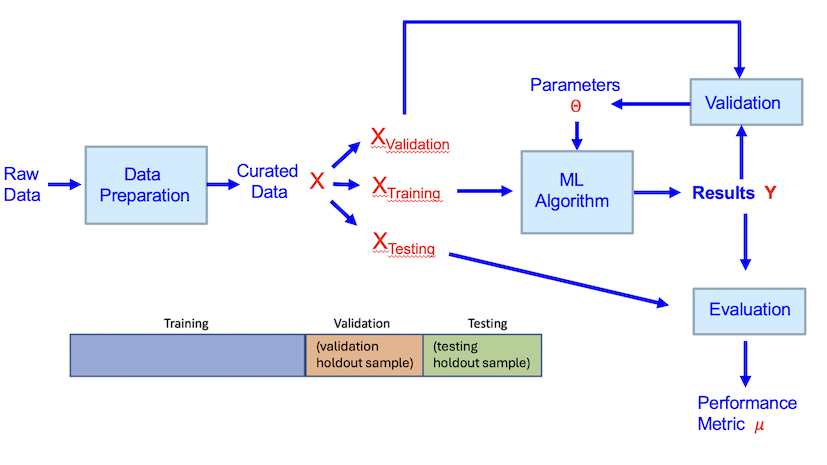

### Validation Curves
By plotting the complexity of the model against the error on the training and validation sets, we can see how underfitting and overfitting work in very precise terms. Remember that we want to hold out the test set until the very end to provide the best possible estimate of the model’s performance on new data!

Such a plot is typically called a **validation curve**.

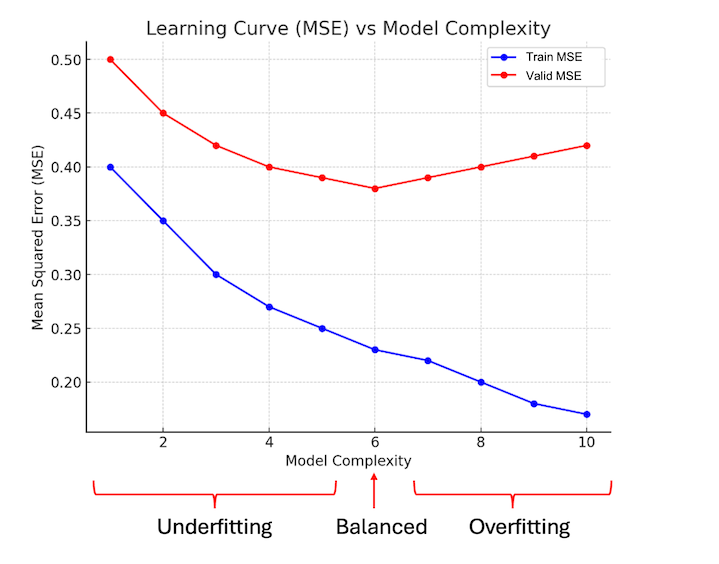

This diagram illustrates the effect of model complexity on the train-validation split. As model complexity increases, the model fits the training data better and better, reducing the training error. However, the validation error initially decreases but then increases as the model begins to overfit. As a first approximation, the ideal model would occur at the minimum of the validation set MSE. The test set provides the final judgment about the quality of your model.

### Creating a Validation Curve
The notebook from this video below can be found in this GitHub repository. Access the notebook and follow along with the video. Pause the video if you need to while you complete the workbook.

#### Cross Validation is the best way to validate your training while you're trying to select a model.

### 4.3 Lesson: Cross Validation

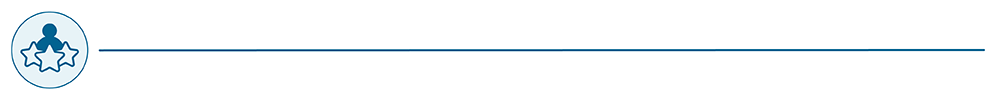

While splitting data into **training, validation**, and **test sets** is useful, the results can still be highly dependent on how the data is split. If the chosen validation set is unrepresentative—containing outliers or missing key patterns—the model’s performance might seem better or worse than it actually is. Since this split is fixed at the start, the choice of validation set can significantly influence the outcome.

**Cross-validation** refines this process by dividing the dataset into k equally-sized subsets, **called folds**. The model is trained on $k-1$ folds and validated on the remaining fold, rotating through all the folds so each has a turn as the validation set. By averaging the results across all folds, cross-validation provides a more reliable estimate of model performance, reducing the risk of overfitting or underfitting that might arise from relying on a single validation set. This technique is especially useful for smaller datasets, where the risk of an unrepresentative validation set is higher.

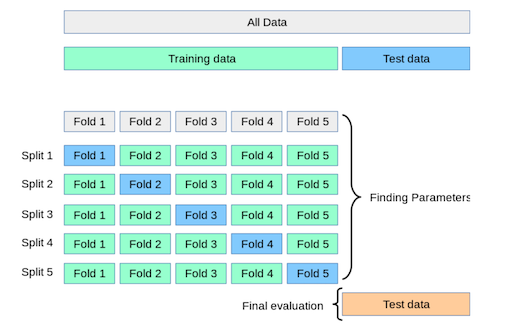

How do we choose the right $K$? One issue with K-fold cross-validation is that the validation sets can sometimes be non-representative, leading to higher variance in performance estimates: 

In K-fold cross-validation, increasing $K$ (the number of folds) reduces the bias of the performance estimate because the model is trained on more data in each fold. However, larger $K$ values also decrease the variance of the estimate, as the training sets become more consistent across folds. The trade-off is that higher $K$ values lead to increased computational cost, as the model must be trained more times. Typically, using 5- or 10-fold cross-validation strikes a good balance between bias, variance, and computational efficiency.

In K-fold cross-validation, increasing $K$ (the number of folds) reduces the bias of the performance estimate because the model is trained on more data in each fold. However, larger $K$ values also decrease the variance of the estimate, as the training sets become more consistent across folds. The trade-off is that higher $K$ values lead to increased computational cost, as the model must be trained more times. Typically, using 5- or 10-fold cross-validation strikes a good balance between bias, variance, and computational efficiency.

#### Leave-One-Out Cross Validation (LOOCV)
LOOCV tends to produce nearly unbiased estimates of the test error because each training set is almost as large as the full dataset. However, LOOCV can sometimes exhibit higher variance compared to K-Fold CV for small k. This variance arises because LOOCV averages the outputs of models trained on datasets with minimal differences (each training set excludes only one observation), which can lead to estimates that are sensitive to outliers or highly correlated predictions.

#### Bias-Variance Tradeoff for Cross-Validation
While LOOCV tends to produce unbiased estimates of the test error (because each training set is almost as large as the full dataset), it also has high variance. This high variance arises because LOOCV averages the outputs of models trained on nearly identical datasets, leading to highly correlated estimates. 

In contrast, K-Fold CV (with $K<n$) provides a middle ground, where the training sets have less overlap, reducing the correlation between models and thus lowering variance. Although K-Fold CV may introduce some bias, it strikes a better balance between bias and variance. Typically, $k=5$ or $10$ is recommended, as these values yield test error estimates that are generally reliable without suffering from either excessive bias or high variance.

#### Think about it
- If we have a training set and a single validation set, why might cross-validation still provide a more reliable estimate of a model's performance?
- Why is the number of folds in cross-validation important? How might using a very small or very large number of folds (e.g., 2 or 50) affect model performance and computational cost?
- In some cases, cross-validation is run multiple times (e.g., different random splits of data in repeated cross-validation). Why might this provide a more accurate estimate of model performance?
- If we plot a learning curve and see that training and validation errors are both high, what might that indicate about our model? What about when training error is low but validation error is high?


